# Analisis univariante y bivariante

El set de datos de los precios de las viviendas de California puede considerarse como el "Hola mundo" del análisis de regresión en machine learning.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Leemos nuestro fichero de datos:

In [ ]:
df = pd.read_feather('cdiae/data/03_model_input/california_housing_clean.ftr')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
1,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
2,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
3,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
4,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992


<pre>
:Attribute Information:
    - MedInc:       ingreso mediano en la zona
    - HouseAge:     edad mediana de las casas en la zona
    - AveRooms:     número promedio de habitaciones por hogar
    - AveBedrms:    número promedio de dormitorios por hogar
    - Population:   población de la zona
    - AveOccup:     número promedio de miembros del hogar
    - Latitude:     latitud de la zona
    - Longitude:    longitud de la zona
</pre>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16393 entries, 0 to 16392
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      16393 non-null  float64
 1   HouseAge    16393 non-null  float64
 2   AveRooms    16393 non-null  float64
 3   AveBedrms   16393 non-null  float64
 4   Population  16393 non-null  float64
 5   AveOccup    16393 non-null  float64
 6   Latitude    16393 non-null  float64
 7   Longitude   16393 non-null  float64
 8   target      16393 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


### Mostramos los datos a estimar

<Axes: xlabel='target', ylabel='Count'>

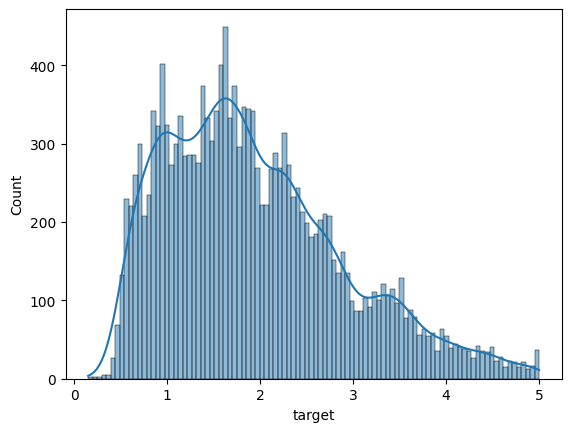

In [6]:
target = df['target']
sns.histplot(target, bins=100, kde=True)

## **Analisis univariante**

In [7]:
num_cols = df.select_dtypes(include="number").columns.tolist()
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,16393.0,3.664875,1.448800,0.536000,2.563900,3.500000,4.593800,8.011300
HouseAge,16393.0,29.491795,12.204684,1.000000,19.000000,30.000000,38.000000,52.000000
AveRooms,16393.0,5.157438,1.044754,2.032738,4.425963,5.144289,5.852735,8.452915
AveBedrms,16393.0,1.047261,0.066532,0.866013,1.002770,1.043807,1.088685,1.239521
Population,16393.0,1270.523699,627.220656,5.000000,812.000000,1158.000000,1635.000000,3132.000000
AveOccup,16393.0,2.862434,0.625743,1.161290,2.434066,2.811881,3.243553,4.560748
Latitude,16393.0,35.668856,2.139559,32.540000,33.940000,34.290000,37.730000,41.950000
Longitude,16393.0,-119.627363,1.995430,-124.350000,-121.820000,-118.600000,-118.030000,-114.570000
target,16393.0,1.942280,0.964867,0.149990,1.188000,1.781000,2.509000,5.000000


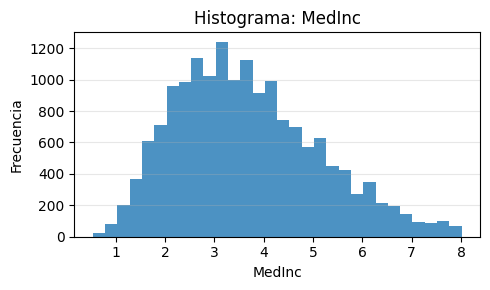

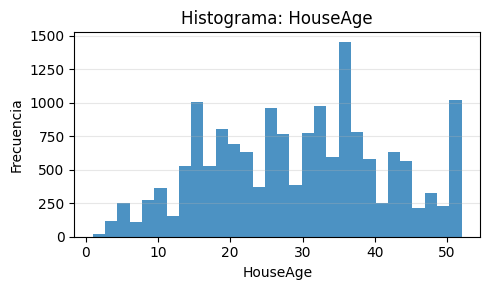

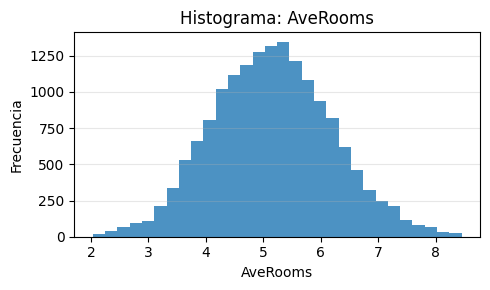

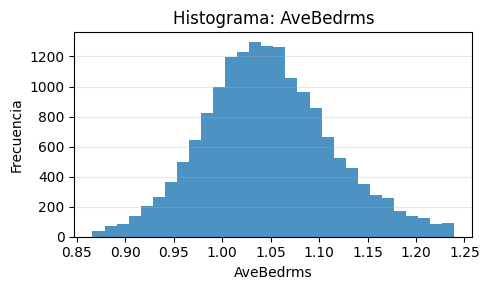

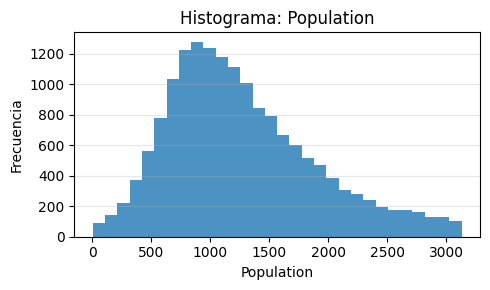

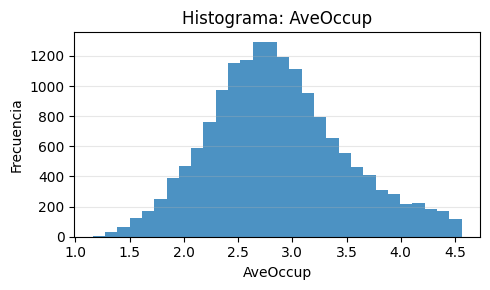

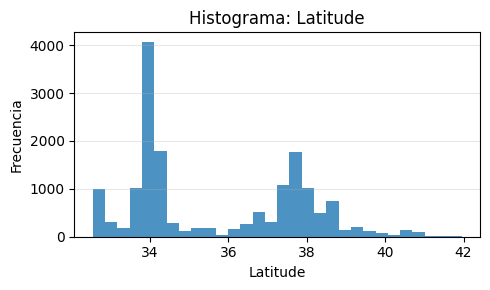

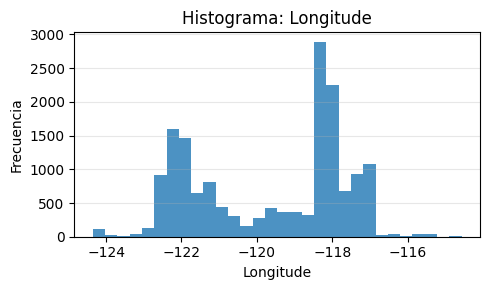

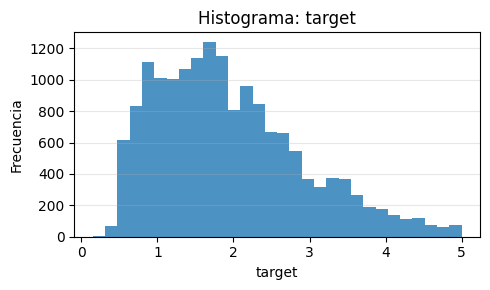

In [8]:
for col in num_cols:
    plt.figure(figsize=(5,3))
    df[col].plot(kind="hist", bins=30, alpha=0.8)
    plt.title(f"Histograma: {col}")
    plt.xlabel(col); plt.ylabel("Frecuencia"); plt.grid(True, axis="y", alpha=0.3)
    plt.tight_layout()
    plt.plot()

## **Analisis bivariante**: Visualización de las correlaciones - Matriz de correlación (Pearson)
Parametros disponibles:

 - `df.corr(method='pearson')` # por defecto
 - `df.corr(method='spearman')`
 - `df.corr(method='kendall')`

Modo simple:

In [9]:
df.corr(method='spearman')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.166239,0.676132,-0.264384,-0.008025,-0.020296,-0.086088,0.001788,0.647352
HouseAge,-0.166239,1.000000,-0.205571,-0.070460,-0.269898,-0.026677,0.029282,-0.135665,0.069046
AveRooms,0.676132,-0.205571,1.000000,-0.026036,-0.074485,0.094532,0.126024,-0.051882,0.242303
AveBedrms,-0.264384,-0.070460,-0.026036,1.000000,0.091749,-0.098717,0.033754,-0.008288,-0.109180
Population,-0.008025,-0.269898,-0.074485,0.091749,1.000000,0.221867,-0.106024,0.110044,0.003893
AveOccup,-0.020296,-0.026677,0.094532,-0.098717,0.221867,1.000000,-0.152444,0.187324,-0.256574
Latitude,-0.086088,0.029282,0.126024,0.033754,-0.106024,-0.152444,1.000000,-0.885869,-0.165726
Longitude,0.001788,-0.135665,-0.051882,-0.008288,0.110044,0.187324,-0.885869,1.000000,-0.063706
target,0.647352,0.069046,0.242303,-0.109180,0.003893,-0.256574,-0.165726,-0.063706,1.000000


Modo visual con seaborn:

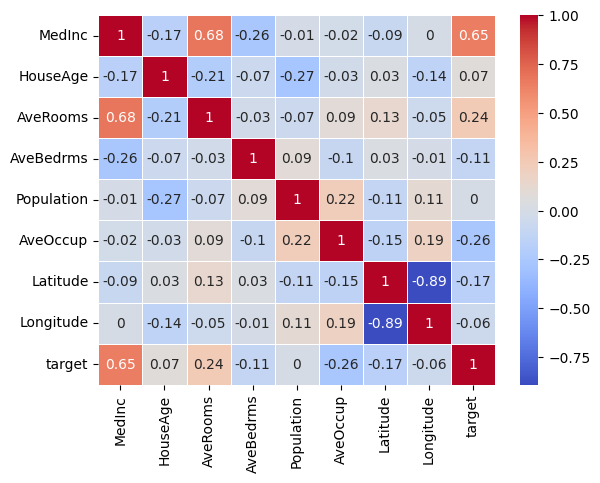

In [10]:
corr = df.corr(method='spearman').round(2)
ax = sns.heatmap(corr, cmap="coolwarm", annot=True, linewidths=.5)

Este gráfico nos sirve para identificar la multicolinealidad entre variables. Por ejemplo, AveRooms (Habitaciones)y AveBedrms (Dormitorios) tiene una correlacion del 0.84, por tanto, podriamos prescindir de una ellas para nuestro modelo.

### Analisis visual bivariante

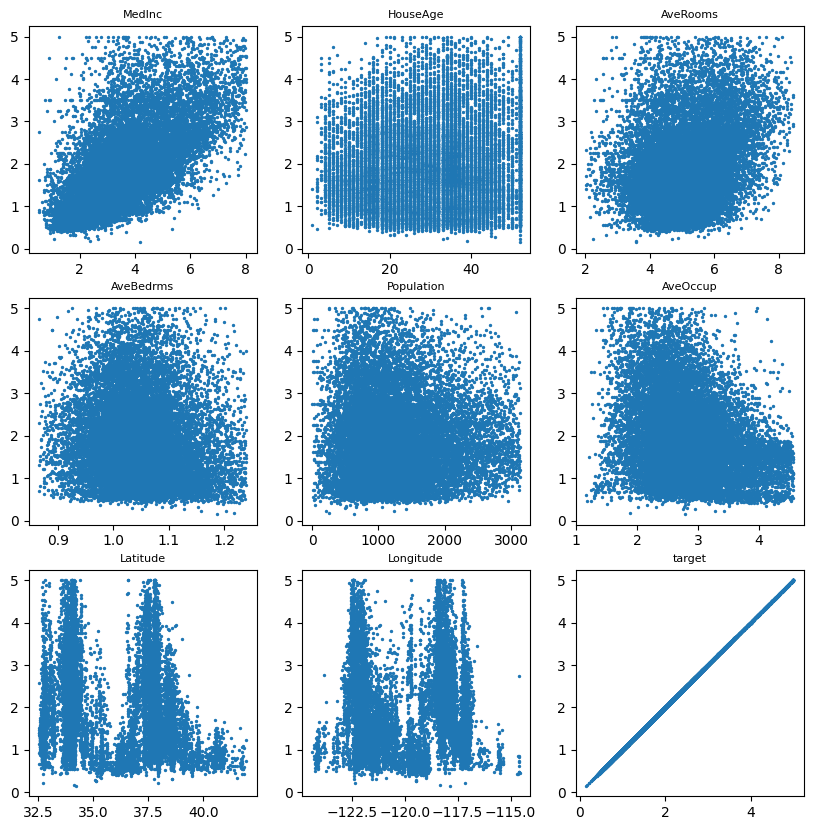

In [11]:
plt.figure(figsize=(10,10))
for index, columns in enumerate(df.columns[:9]):
    plt.subplot(331+index)
    plt.scatter(df[columns], target, s=2) 
    plt.title(columns, fontsize=8)
plt.show()

Se aprecian varias variables explicativas que pueden predecir el precio de una vivienda, la más llamativa sería los ingresos de la zona (MedInc), y el número de habitaciones (AveRooms), donde se aprecia visualmente que a mayores ingresos medios y mayor numero de habitaciones mayor precio.

In [12]:
# Para ordenar aquellas variables con mayor correlación
df.corr(method='pearson')['target'].sort_values(ascending=False)

target        1.000000
MedInc        0.629168
AveRooms      0.257198
HouseAge      0.096836
Population   -0.012060
Longitude    -0.042699
AveBedrms    -0.094815
Latitude     -0.149528
AveOccup     -0.281411
Name: target, dtype: float64